# 1. Affline Transform of AWB map

## AWB GetFCMMappedOutput

### GetRelatedRefLine

In [6]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from __future__ import division

#FcmInput [r/g, b/g]
def GetRelatedRefLine(FcmInput, refPoint):
    x1 = FcmInput[0]
    y1 = FcmInput[1]
    min_dist0 = 10000
    min_dist1 = 10000

    p1 = 0
    p2 = 0
    for i in range(len(refPoint)):
        x2 = refPoint[i][0]
        y2 = refPoint[i][1]
        diff = math.sqrt( (x1-x2)*(x1-x2) + (y1-y2)*(y1-y2) )
        if(diff < min_dist0):
            p2 = p1
            p1 = i
            min_dist1 = min_dist0
            min_dist0 = diff
        elif(diff < min_dist1):
            p2 = i
            min_dist1 = diff
    print "relate ref point: "
    print p1, p2
    P = [0,0]
    P[0] = p1
    P[1] = p2
    return P
    
#peerDecision [r/g, b/g]
#p1 is the diff min refpoint index
#p2 is the second min diff

def DualcamAfflineTransform(peerDecision, p1, p2):
    coeff = [0, 0, 0, 0]
    slaveRefPt_p1 = slaveRefPoint[p1]
    slaveRefPt_p2 = slaveRefPoint[p2]
    MRefPt_p1 = refPoint[p1]
    MRefPt_p2 = refPoint[p2]

#    currentRefPts_p1 = slaveRefPoint[p1]
#    currentRefPts_p2 = slaveRefPoint[p2]
#    peerRefPt_p1 = refPoint[p1]
#    peerRefPt_p2 = refPoint[p2]
    
    dx1 = MRefPt_p2[0] - MRefPt_p1[0]
    dx2 = slaveRefPt_p2[0] - slaveRefPt_p1[0]
    dy1 = MRefPt_p2[1] - MRefPt_p1[0]
    dy2 = slaveRefPt_p2[0] - slaveRefPt_p1[0]
    
    coeff[0] = (dx1*dx2 + dy1*dy2)/(dx1*dx1+dy1*dy1)
    coeff[1] = (dy1*dx2 - dx1*dy2)/(dx1*dx1+dy1*dy1)
    coeff[2] = slaveRefPt_p1[0] - coeff[0]* MRefPt_p1[0] - coeff[1] * MRefPt_p1[1]
    coeff[3] = slaveRefPt_p1[1] + coeff[1]* MRefPt_p1[0] - coeff[0] * MRefPt_p1[1]
    
    FcmOutput = [0,0]
    FcmOutput[0] = coeff[0] * peerDecision[0] + coeff[1] * peerDecision[1] + coeff[2]
    FcmOutput[1] = (-1)*coeff[1] * peerDecision[0] + coeff[0] * peerDecision[1] + coeff[3]
    print "current decision FcmOutput: "
    print FcmOutput
    FcmOutput[0] = round(FcmOutput[0], 3)
    FcmOutput[1] = round(FcmOutput[1], 3)
    return FcmOutput

In [7]:
FcmInput = [0.48,0.48]
refPoint = [[0.41,0.82], [0.43, 0.72], [0.55, 0.65], [0.61, 0.45], [0.70, 0.52], [0.81, 0.39], [1.08, 0.28]]
refPointComment = ['0-D75', '1-D65', '2-D50', '3-CWF','4-TL84','5-A','6-H']

slaveRefPoint = [[0.3,0.7], [0.4, 0.65], [0.48, 0.57], [0.52, 0.38], [0.65, 0.4], [0.72, 0.3], [0.98, 0.19]]

FcmOutput = [0,0]

In [8]:
p = GetRelatedRefLine(FcmInput, refPoint)
print p[0], p[1]
print "input decision: "
print FcmInput
print "refPoint: "
print refPoint[p[0]],refPoint[p[1]]
print "slaveRefPoint"
print slaveRefPoint[p[0]], slaveRefPoint[p[1]]
FcmOutput = DualcamAfflineTransform(FcmInput, p[0], p[1])
print FcmOutput[0], FcmOutput[1]

relate ref point: 
3 2
3 2
input decision: 
[0.48, 0.48]
refPoint: 
[0.61, 0.45] [0.55, 0.65]
slaveRefPoint
[0.52, 0.38] [0.48, 0.57]
current decision FcmOutput: 
[0.47692307692307706, 0.2846153846153845]
0.477 0.285


## use opencv calc afflineTransform


In [36]:
import cv2
print p[0], p[1]
print "input decision: "
print FcmInput
print "refPoint: "
print refPoint[p[0]],refPoint[p[1]]
print "slaveRefPoint"
print slaveRefPoint[p[0]], slaveRefPoint[p[1]]

print [refPoint[p[0]], refPoint[p[1]]]
print [slaveRefPoint[p[0]], slaveRefPoint[p[1]]]
pt_ref = np.float32([refPoint[p[0]], refPoint[p[1]], [0,0]])
pt_slave = np.float32([slaveRefPoint[p[0]], slaveRefPoint[p[1]], [0,0]])

AfflineTransform = cv2.getAffineTransform(pt_ref, pt_slave)

print AfflineTransform


newPoint_x = AfflineTransform[0][0]*FcmInput[0] + AfflineTransform[0][1]*FcmInput[1]
newPoint_y = AfflineTransform[1][0]*FcmInput[0] + AfflineTransform[1][1]*FcmInput[1]
print newPoint_x, newPoint_y


3 2
input decision: 
[0.48, 0.48]
refPoint: 
[0.61, 0.45] [0.55, 0.65]
slaveRefPoint
[0.52, 0.38] [0.48, 0.57]
[[0.61, 0.45], [0.55, 0.65]]
[[0.52, 0.38], [0.48, 0.57]]
[[ 0.81879187  0.04563762  0.        ]
 [-0.06375841  0.93087252  0.        ]]
0.414926154754 0.416214775578


[0.41, 0.43, 0.55, 0.61, 0.7, 0.81, 1.08] [0.82, 0.72, 0.65, 0.45, 0.52, 0.39, 0.28]
[0.3, 0.4, 0.48, 0.52, 0.65, 0.72, 0.98] [0.7, 0.65, 0.57, 0.38, 0.4, 0.3, 0.19]


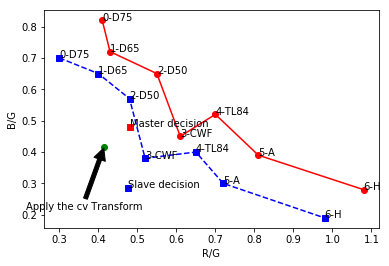

In [39]:
x_data=[]
y_data=[]
#master refPoint
for i in range(len(refPoint)):
    x_data.append(refPoint[i][0])
    y_data.append(refPoint[i][1])
#x_data.append(FcmInput[0])
#y_data.append(FcmInput[1])
print x_data,y_data

s_x_data = []
s_y_data = []
#slave refPoint

for i in range(len(slaveRefPoint)):
    s_x_data.append(slaveRefPoint[i][0])
    s_y_data.append(slaveRefPoint[i][1])
#s_x_data.append(FcmOutput[0])
#s_y_data.append(FcmOutput[1])
print s_x_data, s_y_data
    
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x_data, y_data, 'r-o', label='RefPoint')
plt.plot(FcmOutput[0], FcmOutput[1], 'bs', label='Ref Decision')

plt.plot(s_x_data, s_y_data, 'b--s', label='Slave RefPoint')
plt.plot(FcmInput[0], FcmInput[1], 'rs', label='Slave Decision')

plt.plot(newPoint_x, newPoint_y, 'go')

for i in range(len(refPoint)):
    ax.annotate(refPointComment[i], refPoint[i])
    ax.annotate(refPointComment[i], slaveRefPoint[i])
ax.annotate('Master decision', FcmInput)
ax.annotate('Slave decision', FcmOutput)
ax.annotate('Apply the cv Transform', (newPoint_x, newPoint_y),(newPoint_x-0.2, newPoint_y-0.2),horizontalalignment='left',
            arrowprops=dict(facecolor='black', shrink=0.02))

plt.xlabel('R/G')
plt.ylabel('B/G')
plt.show()